In [898]:
import pandas as pd
import numpy as np
from plotnine import *
import plotnine
from sklearn.cluster import KMeans
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore', category = FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [899]:
df = pd.read_csv('Health_Condition_Level.csv')
df2 = pd.DataFrame()

df['Weight']=df['Weight']
df['bmi'] = (df['Weight']/(df['Height']*df['Height']))
df['AC1']=df['AC']
df['AC1'].replace(['no','Sometimes', 'Frequently','Always'], [0.0,1.0,2.0,3.0], inplace=True)
df['AC1'] = pd.to_numeric(df['AC1'])

df['Smoking']=df['Smoker']
df['Smoking'].replace(['no','yes'], [0.0,1.0], inplace=True)
df['Smoking'] = pd.to_numeric(df['Smoking'])


df['Smoker'] = df['Smoker'].apply(str)

df['Lifestyle_feature1'] = df['Lifestyle_feature1'].apply(str)
df['Lifestyle_feature3'] = df['Lifestyle_feature3'].apply(str)
df['Medical_history'] = df['Medical_history'].apply(str)
df['Sex'] = df['Sex'].apply(str)
df['SC'] = df['SC'].apply(str)
df['AC'] = df['AC'].apply(str)
df['HSM'] = df['HSM'].apply(str)



dftemp = df.drop(df.select_dtypes('object'), axis=1)
df_norm = (dftemp-dftemp.min())/(dftemp.max()-dftemp.min())
df.update(df_norm)
df = df.drop(df.select_dtypes('object'), axis=1)
df['bmi']=df['bmi']*15
df = df.drop('Weight', axis=1)
df = df.drop('Height', axis=1)
df = df.drop('Lifestyle_feature2', axis=1)
df = df.drop('Lifestyle_feature4', axis=1)
df = df.drop('EDUT', axis=1)
df = df.drop('EF', axis=1)
df = df.drop('FI', axis=1)
df = df.drop('DFC', axis=1)
df = df.drop('AC1', axis=1)
df = df.drop('Smoking', axis=1)



df['Age']=df['Age']*10
df['bmi']=df['bmi']*50



df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1839 non-null   float64
 1   bmi     1839 non-null   float64
dtypes: float64(2)
memory usage: 28.9 KB


In [900]:
df

,Age,bmi
0,2.553,490.043
1,2.540,502.098
2,1.600,716.733
3,2.686,408.969
4,3.447,416.017
...,...,...
1834,2.196,179.439
1835,5.021,270.472
1836,2.340,92.358
1837,2.236,391.049


In [901]:
df.select_dtypes('object').nunique()


Series([], dtype: float64)

In [902]:
df.select_dtypes('object').nunique()

Series([], dtype: float64)

In [903]:
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))




Categorical columns           : []
Categorical columns position  : []


In [904]:
dfMatrix = df.to_numpy()
dfMatrix

array([[  2.55311404, 490.04330304],
       [  2.54045809, 502.09805492],
       [  1.60027532, 716.73256283],
       ...,
       [  2.34042553,  92.35783807],
       [  2.23647766, 391.04916581],
       [  2.12791404, 475.75733028]])

In [905]:
catColumnsPos

[]

In [906]:
kprototype = KMeans( n_clusters = 6, random_state = 0)


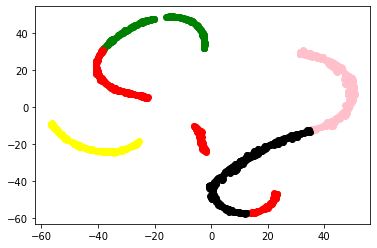

In [907]:
from sklearn.manifold import TSNE
df_copy =  df.drop(df.columns[catColumnsPos],axis = 1)
tsne = TSNE(n_components=2)
tsne_obj = tsne.fit_transform(df_copy)
tsne_df = pd.DataFrame({'component_0':tsne_obj[:,0],'component_1':tsne_obj[:,1]})

tsne_df['target']=pd.Series(kprototype.fit_predict(dfMatrix))
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]
tsne_df_3 = tsne_df[tsne_df['target'] == 3]
tsne_df_4 = tsne_df[tsne_df['target'] == 4]




# target 별 시각화
plt.scatter(tsne_df_0['component_0'], tsne_df_0['component_1'], color = 'pink', label = 'class 0')
plt.scatter(tsne_df_1['component_0'], tsne_df_1['component_1'], color = 'green', label = 'class 1')
plt.scatter(tsne_df_2['component_0'], tsne_df_2['component_1'], color = 'yellow', label = 'class 2')
plt.scatter(tsne_df_3['component_0'], tsne_df_3['component_1'], color = 'red', label = 'class 3')
plt.scatter(tsne_df_4['component_0'], tsne_df_4['component_1'], color = 'black', label = 'class 4')



In [908]:

df_ans = pd.DataFrame()
df_ans['id'] = df_ans.index
df_ans['predict']=pd.Series(kprototype.fit_predict(dfMatrix ))
df_ans['id'] = df_ans.index
with open('csv_data5.csv', 'w') as csv_file:
    df_ans.to_csv(path_or_buf=csv_file,index=False)